# importacion 'os'

In [ ]:
import os

# Montando Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

# Importando y descargando GTZAN 👇🏻

In [ ]:
!pip install kaggle
api_token = {"username":"franciscoayracacceres","key":"0faed9196b5d77ac39f381ebcbcea42e"}

In [ ]:
from google.colab import files
files.upload()

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list

In [ ]:
!kaggle config set -n path -v drive/MyDrive/ML_DATABASE/

- path is now set to: drive/MyDrive/ML_DATABASE/


In [ ]:
!kaggle datasets download --unzip andradaolteanu/gtzan-dataset-music-genre-classification --force

100% 1.21G/1.21G [00:30<00:00, 45.5MB/s]
100% 1.21G/1.21G [00:30<00:00, 42.5MB/s]


In [ ]:
os.listdir("drive/MyDrive/ML_DATABASE")

---
---

# Conv1D

### Importaciones

In [ ]:
import librosa
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dense, Dropout, Flatten
from keras.layers import BatchNormalization, Activation
from keras.utils import to_categorical

### Asegurando el uso de gpu para la creacion, sosten y uso de la red convolucional

In [ ]:
device_name = tf.test.gpu_device_name()

assert device_name == '/device:GPU:0', "mira la nota a la derecha para activar el uso de GPU"

print('se encontro una gpu')

se encontro una gpu


In [ ]:
path = "/content/drive/My Drive/ML_DATABASE/datasets/andradaolteanu/gtzan-dataset-music-genre-classification/Data/genres_original"
# path = "/content/drive/My Drive/ML_DATABASE/datasets/pequedataset"
assert os.listdir(path)

---
---
## <center>Trabajo con espectogramas</center>

---
---

In [ ]:
!pip install opencv

In [ ]:
histograms_path = "/content/drive/My Drive/ML_DATABASE/datasets/andradaolteanu/gtzan-dataset-music-genre-classification/Data/images_original"

import cv2
songs = []
genres = []

image_1d_shape = 373248

for genero in os.listdir(histograms_path):
  for histogram in os.listdir(os.path.join(histograms_path, genero)):
    song = cv2.imread(os.path.join(os.path.join(histograms_path, genero), histogram))
    songs.append(np.reshape(song, (image_1d_shape,))[:100000])
    genres.append(genero)
  print(f"{genero} leido")

X, y = np.array(songs), np.array(genres)

blues leido
classical leido
country leido
disco leido
hiphop leido
jazz leido
metal leido
pop leido
reggae leido
rock leido


In [ ]:
with tf.device('/device:GPU:0'):

  # ENCODE LABELS
  encoder = LabelEncoder()
  y = encoder.fit_transform(y)
  y = to_categorical(y, num_classes=10)  # Assuming 10 genres

  # PARTICIONAR LOS DATOS
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

  # REMODELAR LOS DATOS
  X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
  X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
  X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

  # MODELO DE CNN 1D BASADO EN LA ARQUITECTURA ResNet
  model = Sequential()

  # PRIMERA CAPA DE CONVOLUCION
  model.add(Conv1D(64, kernel_size=3, strides=1, padding="same", input_shape=(X_train.shape[1], 1)))
  model.add(BatchNormalization())
  model.add(Activation("relu"))

  # BLOQUES RESIDUALES
  for _ in range(1):
      model.add(Conv1D(16, kernel_size=3, strides=1, padding="same"))
      model.add(BatchNormalization())
      model.add(Activation("relu"))
      model.add(Conv1D(16, kernel_size=3, strides=1, padding="same"))
      model.add(BatchNormalization())
      model.add(Activation("relu"))

  # CAPA DE POOLING
  model.add(MaxPooling1D(pool_size=2, strides=2))

  # CAPA CONECTADA COMPLETAMENTE
  model.add(Flatten())
  model.add(Dense(64, activation="relu"))
  model.add(Dropout(0.5))
  model.add(Dense(10, activation="softmax"))  # Assuming 10 genres

  # COMPILACION DEL MODELO
  model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

  # ENTRENAMIENTO
  model.fit(X_train, y_train, batch_size=80, epochs=100, validation_data=(X_val, y_val))
  # model.save("drive/MyDrive/Conv1D(spectograms).h5")

Epoch 1/100
8/8 [==============================] - 22s 2s/step - loss: 114.6374 - accuracy: 0.1064 - val_loss: 2.3028 - val_accuracy: 0.0688
Epoch 2/100
8/8 [==============================] - 7s 921ms/step - loss: 2.3904 - accuracy: 0.1033 - val_loss: 2.3029 - val_accuracy: 0.0688
Epoch 3/100
8/8 [==============================] - 7s 921ms/step - loss: 2.3026 - accuracy: 0.1049 - val_loss: 2.3030 - val_accuracy: 0.0688
Epoch 4/100
8/8 [==============================] - 7s 926ms/step - loss: 2.3025 - accuracy: 0.1049 - val_loss: 2.3031 - val_accuracy: 0.0688
Epoch 5/100
8/8 [==============================] - 8s 952ms/step - loss: 2.3024 - accuracy: 0.1049 - val_loss: 2.3031 - val_accuracy: 0.0688
Epoch 6/100
8/8 [==============================] - 7s 928ms/step - loss: 2.3024 - accuracy: 0.0876 - val_loss: 2.3031 - val_accuracy: 0.1063
Epoch 7/100
8/8 [==============================] - 7s 928ms/step - loss: 2.3023 - accuracy: 0.1111 - val_loss: 2.3031 - val_accuracy: 0.1063
Epoch 8/100
8

In [ ]:
del model, encoder, X_train, X_test, y_train, y_test, X_val, y_val
# !nvidia-smi

---
---
---

---
---
## <center>Trabajo con audios(Dataset virgen)</center>

---
---

### Lectura del dataset

In [ ]:
# CARGAR UN ARCHIVO DE AUDIO
def load_audio_file(file_path):
    input_length = 100000  # Esto es 15 segundos con una frecuencia de muestreo de 44100.
    data = librosa.core.load(file_path, sr=22050)[0]  # Utilizamos librosa para cargar un archivo de audio con una frecuencia de muestreo de 22050.
    if len(data) > input_length:
        data = data[:input_length]
    else:
        data = np.pad(data, (0, max(0, input_length - len(data))), "constant")
    return data


In [ ]:
# CARGAR EL CONJUNTO DE DATOS
def load_dataset(path):
    genres = os.listdir(path)
    X, y = [], []
    for genre in genres:
        if genre == ".ipynb_checkpoints":
          continue
        genre_path = os.path.join(path, genre)
        for file_name in os.listdir(genre_path):
            if file_name == ".ipynb_checkpoints":
              continue
            file_path = os.path.join(genre_path, file_name)
            try:
              data = load_audio_file(file_path)
              # print(f"audio {file_name} cargado")
            except:
              print(f"error con {file_name}")
              continue
            X.append(data)
            y.append(genre)
        print(f"genero {genre} completado")
    return np.array(X), np.array(y)



In [ ]:
X, y = load_dataset(path)

genero blues completado
genero classical completado
genero country completado
genero disco completado
genero hiphop completado
genero jazz completado
genero metal completado
genero pop completado
genero reggae completado
genero rock completado


### Creacion del modelo

In [ ]:
# ENCODE LABELS
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y = to_categorical(y, num_classes=10)  # Assuming 10 genres

# PARTICIONAR LOS DATOS
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# REMODELAR LOS DATOS
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# MODELO DE CNN 1D BASADO EN LA ARQUITECTURA ResNet
model = Sequential()

# PRIMERA CAPA DE CONVOLUCION
model.add(Conv1D(32, kernel_size=3, strides=1, padding="same", input_shape=(X_train.shape[1], 1)))
model.add(BatchNormalization())
model.add(Activation("relu"))

# BLOQUES RESIDUALES
for _ in range(1):
    model.add(Conv1D(16, kernel_size=3, strides=1, padding="same"))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(Conv1D(16, kernel_size=3, strides=1, padding="same"))
    model.add(BatchNormalization())
    model.add(Activation("relu"))

# CAPA DE POOLING
model.add(MaxPooling1D(pool_size=2, strides=2))

# CAPA CONECTADA COMPLETAMENTE
model.add(Flatten())
model.add(Dense(16, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))  # Assuming 10 genres

# COMPILACION DEL MODELO
model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

# with tf.device('/device:GPU:0'):
  # ENTRENAMIENTO
model.fit(X_train, y_train, batch_size=80, epochs=100, validation_data=(X_val, y_val))
# model.save("drive/MyDrive/Conv1D.h5")


Epoch 1/100
9/9 [==============================] - 22s 705ms/step - loss: 10.8308 - accuracy: 0.0949 - val_loss: 2.3025 - val_accuracy: 0.1180
Epoch 2/100
9/9 [==============================] - 5s 550ms/step - loss: 2.3025 - accuracy: 0.1058 - val_loss: 2.3027 - val_accuracy: 0.1118
Epoch 3/100
9/9 [==============================] - 5s 562ms/step - loss: 2.3607 - accuracy: 0.1120 - val_loss: 2.3029 - val_accuracy: 0.0932
Epoch 4/100
9/9 [==============================] - 5s 591ms/step - loss: 2.3023 - accuracy: 0.0980 - val_loss: 2.3030 - val_accuracy: 0.0932
Epoch 5/100
9/9 [==============================] - 5s 591ms/step - loss: 2.3022 - accuracy: 0.0980 - val_loss: 2.3032 - val_accuracy: 0.0932
Epoch 6/100
9/9 [==============================] - 5s 593ms/step - loss: 2.3022 - accuracy: 0.0871 - val_loss: 2.3033 - val_accuracy: 0.0745
Epoch 7/100
9/9 [==============================] - 5s 591ms/step - loss: 2.3021 - accuracy: 0.0995 - val_loss: 2.3035 - val_accuracy: 0.0745
Epoch 8/100

---
---
---

## Resultados del entrenamiento

In [ ]:
import matplotlib.pyplot as plt

accuracy = model.history.history['accuracy']
val_accuracy = model.history.history['val_accuracy']
accuracy
val_accuracy

[0.11801242083311081,
 0.11180124431848526,
 0.09316769987344742,
 0.09316769987344742,
 0.09316769987344742,
 0.07453416287899017,
 0.07453416287899017,
 0.07453416287899017,
 0.07453416287899017,
 0.11180124431848526,
 0.11180124431848526,
 0.11180124431848526,
 0.11180124431848526,
 0.08074533939361572,
 0.08074533939361572,
 0.08074533939361572,
 0.08074533939361572,
 0.08074533939361572,
 0.08074533939361572,
 0.08074533939361572,
 0.08074533939361572,
 0.08074533939361572,
 0.08074533939361572,
 0.08074533939361572,
 0.08074533939361572,
 0.11801242083311081,
 0.11801242083311081,
 0.08074533939361572,
 0.08074533939361572,
 0.08074533939361572,
 0.08074533939361572,
 0.08074533939361572,
 0.08074533939361572,
 0.08074533939361572,
 0.08074533939361572,
 0.05590062215924263,
 0.05590062215924263,
 0.05590062215924263,
 0.05590062215924263,
 0.05590062215924263,
 0.08074533939361572,
 0.08074533939361572,
 0.11180124431848526,
 0.11180124431848526,
 0.11180124431848526,
 0.1118012

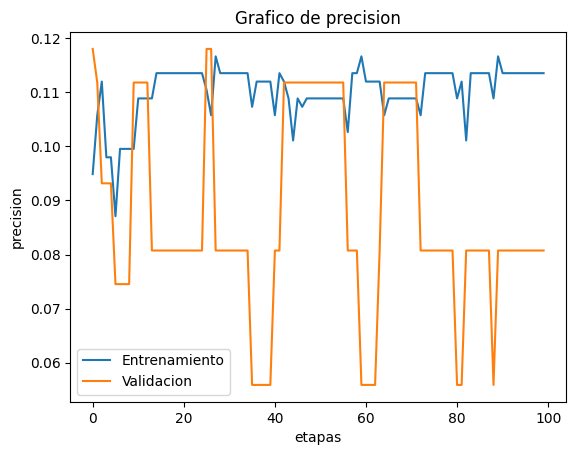

In [ ]:
plt.plot(range(len(accuracy)), accuracy, label='Entrenamiento')
plt.plot(range(len(accuracy)), val_accuracy, label='Validación')
plt.xlabel('etapas')
plt.ylabel('precisión')
plt.title('Grafico de precisión (Espectogramas)')
plt.legend()
plt.savefig('drive/MyDrive/grafico_espectogramas.png')
# plt.savefig('drive/MyDrive/grafico_audio.png')

# Liberacion de recursos

In [ ]:
!pip install numba

In [ ]:
from numba import cuda
device = cuda.get_current_device()
device = cuda.select_device(0)

device.reset()


In [ ]:
!service networking restart

networking: unrecognized service


In [ ]:
!kill -9 -1

In [ ]:
del model, encoder, X_train, X_test, y_train, y_test, X_val, y_val